In [1]:
#standard imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#stats module!!!!!
from scipy import stats

### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

* What is the probability that no cars drive up in the noon hour?

In [4]:
#lambda
#don't overwrite the lambda function!
lamb = 2

In [5]:
#set the distributiosn
wait_time_dist = stats.poisson(lamb)
wait_time_dist

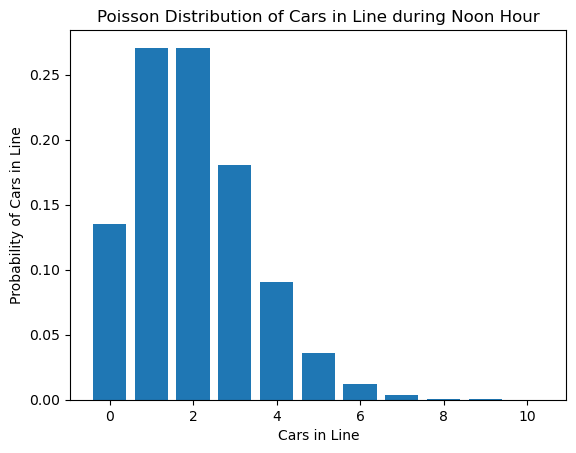

In [51]:
#plot the data
x = np.arange(0,11)
y = [wait_time_dist.pmf(i) for i in x]

plt.bar(x,y)

plt.xlabel('Cars in Line')
plt.ylabel('Probability of Cars in Line')
plt.title('Poisson Distribution of Cars in Line during Noon Hour')
plt.show()

In [6]:
wait_time_dist.pmf(0) # exact amount

0.1353352832366127

* What is the probability that 3 or more cars come through the drive through?

In [53]:
wait_time_dist.sf(2) # greater than

0.32332358381693654

* How likely is it that the drive through gets at least 1 car?

In [55]:
wait_time_dist.sf(0) # greater than

0.8646647167633873

### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [15]:
#set mean and sd
mean = 3.0
std = 0.3

In [17]:
#make the distribution
uni_grades_dist = stats.norm(mean, std)
uni_grades_dist

<Axes: ylabel='Frequency'>

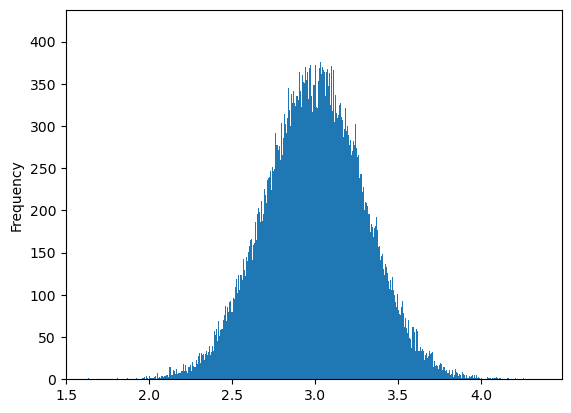

In [18]:
pd.Series(uni_grades_dist.rvs(100_000)).plot.hist(bins=1000)

* What grade point average is required to be in the top 5% of the graduating class?

In [20]:
#given percent and we want the value
round(uni_grades_dist.isf(.05),2)

3.49

* What GPA constitutes the bottom 15% of the class?

In [57]:
round(uni_grades_dist.isf(1-.15),2)

2.69

In [58]:
round(uni_grades_dist.ppf(.15),2)

2.69

* An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [59]:
uni_grades_dist.ppf([0.2,0.3])

array([2.74751363, 2.84267985])

* If I have a GPA of 3.5, what percentile am I in?

In [62]:
uni_grades_dist.cdf(3.5)

0.9522096477271853

### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [24]:
n_trials = 4326
p_of_right = .02

#create distribution
clicks_dist = stats.binom(n_trials, p_of_right)
clicks_dist

In [66]:
clicks_dist.sf(96) # include 97 using the number 96

0.13975823631416448

### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

In [49]:
#define number of trials and probabilty of right
n_trials = 60
p_of_right = .01

#create distribution
questions_dist = stats.binom(n_trials, p_of_right)
questions_dist

What is the probability that at least one of your first 60 answers is correct?

In [67]:
questions_dist.sf(0) # at least one or more (greater than zero)

0.45284335760923855

### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? 

In [68]:
n = round(.9 * 3 * 22)
p = .03

stats.binom(n, p).sf(0) # greater than one studenet to clean up the mess

0.8342199288437352

How likely is it that it goes two days without getting cleaned up? 

In [69]:
stats.binom(n * 2, p).pmf(0) # 

0.027483031992576134

All week?

In [70]:
stats.binom(n * 5, p).pmf(0) # 

0.00012521651388091245

### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? 
Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [71]:
mean = 15 * 2
std = 3 * 2

# 60-15-10-2 = 33  10 mins for the time i am taking to get sandwich
stats.norm(mean, std).cdf(33)

0.6914624612740131

### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [2]:
import pydataset
from env import get_db_url

In [3]:
url = get_db_url('employees')

In [14]:
salary_df = pd.read_sql('''SELECT * 
                FROM salaries
                WHERE to_date > NOW()''', url)
salary_df.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


a. What percent of employees earn less than 60,000?

In [5]:
mean = salary_df.salary.mean()
std = salary_df.salary.std()

In [6]:
salary_dist = stats.norm(mean, std)
salary_dist

In [9]:
salary_dist.cdf(60_000)

0.24385742480214423

b. What percent of employees earn more than 95,000?

In [10]:
salary_dist.sf(95_000)

0.09208819199804053

c. What percent of employees earn between 65,000 and 80,000?

In [12]:
salary_dist.cdf([65_000, 80_000])

array([0.34270292, 0.67776349])

d. What do the top 5% of employees make?

In [13]:
salary_dist.isf(.05)

100484.64454102777